In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

## 1.1A
Datasets are 4 text files stored in csv format. Each record is on single line and attributes are separated with TAB character. All 4 datasets contain common attribute imei which makes relation within tables.

### Connections csv

In [82]:
connections = pd.read_csv('data/connections.csv', sep='\t')
#connections = sns.load_dataset("data/connections.csv")

connections.head()


,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
0,2018-05-05 10:00:00,3590433799317661107,0.0,11.65403,10.65335,10.48791,16.91620,5.04564,36.21508,14.24956,4.09319,15.20934,5.11764
1,2018-05-05 10:01:00,3590433799317662063,1.0,10.29551,10.46363,10.98438,15.65637,14.82931,24.83765,57.49911,23.94919,8.82448,44.13570
2,2018-05-05 10:02:00,863033069630348313,0.0,12.12831,9.53752,6.78080,6.98948,10.92433,3.29441,20.37891,52.55353,49.51037,99.75215
3,2018-05-05 10:03:00,359043379931766114,1.0,11.06419,11.55759,8.87744,11.84499,15.45902,24.78878,36.40299,25.77644,21.84167,65.17774
4,2018-05-05 10:04:00,3590433799317661842,1.0,12.08457,10.42860,9.82241,12.48869,12.85363,40.98237,74.13316,96.77450,18.48116,90.77304


In [83]:
connections.shape

(15074, 13)

Connections csv has 15074 records (rows) and 13 attributes (columns). 

In [84]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15074 non-null  object 
 1   imei               15074 non-null  int64  
 2   mwra               15074 non-null  float64
 3   c.android.youtube  15074 non-null  float64
 4   c.dogalize         15074 non-null  float64
 5   c.android.gm       15074 non-null  float64
 6   c.katana           15074 non-null  float64
 7   c.android.chrome   15074 non-null  float64
 8   c.raider           15074 non-null  float64
 9   c.android.vending  15074 non-null  float64
 10  c.UCMobile.intl    15074 non-null  float64
 11  c.UCMobile.x86     15074 non-null  float64
 12  c.updateassist     15074 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


This data has no null values (the number of Non-Null values for each column is the same as the total number of rows). First column contains values of type object (which represents timestamp) and  will be possibly converted to type timestamp during further processing. The second attribute contains values of type int64 and stores International Mobile Equipment Identity number. The third one contains values of type float64, however obtains only one of two values: 1. or 0. representing malware-related-activity, so it will be probably converted to type boolean. Other 10 columns contain float64 values, which represent input value for evaluation of mwra. First three attributes (ts, imei, mwra) are discrete (categorical) attributes and the rest are continuous (numeric) values. 

The pair of first and second column (ts, imei) are keys for snapshot of the rest of values. The third column is the result of evaluation. 

In [85]:
# oprava dat 1.2:
#connections['ts'] = pd.to_datetime(connections['ts'])
# maybe also mwra to boolean

### Devices csv

In [86]:
devices = pd.read_csv('data/devices.csv', sep='\t')
devices.head()

,latitude,longitude,store_name,code,location,imei
0,18.57677,-72.22625,Croix-des-Bouquets,HT,America/Port-au-Prince,3590433799317662113
1,-25.54073,152.70493,Maryborough,AU,Australia/Brisbane,8630330696303481107
2,50.88506,4.07601,Denderleeuw,BE,Europe/Brussels,8630330696303481461
3,48.15659,28.28489,Soroca,MD,Europe/Chisinau,3590433799317661016
4,-34.64966,-58.38341,Barracas,AR,America/Argentina/Buenos_Aires,3590433799317662253


In [87]:
devices.shape

(2895, 6)

Devices csv has 2895 records (rows) and 6 attributes (columns). 

In [88]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2895 non-null   float64
 1   longitude   2895 non-null   float64
 2   store_name  2895 non-null   object 
 3   code        2892 non-null   object 
 4   location    2895 non-null   object 
 5   imei        2895 non-null   object 
dtypes: float64(2), object(4)
memory usage: 135.8+ KB


In [89]:
devices[devices.isnull().any(axis=1)]

,latitude,longitude,store_name,code,location,imei
697,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348784
1424,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,8630330696303481693
2861,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,3590433799317662386


In [90]:
devices.shape[0] - devices.dropna().shape[0]

3

It seems that this data has 3 null values in attribute code, however after manually checking the data, we found out that the pandas function read_csv interprets the value NA in column code in table devices incorrectly as it assumes that it is a NaN value, while it is a valid country code. Therefore, we need to load data with the keep_default_na value set to False.

First and second attribute contains geolocation latitude and longitude position. Their values are float64. Next three attributes contain values of type object. They are strings which represent identification of store which sold the device. Attribute store_name contains name of the store, code is the code of the country, in which the store is located and the location is the name of the continent and the city in which the device was sold. In further processing, the location attribute might be split to two columns. The last attribute contains values of type int64 and stores International Mobile Equipment Identity number. All attributes are discrete (categorical). 

The attribute imei is the key for this table.

### Processes csv

In [91]:
processes = pd.read_csv('data/processes.csv', sep='\t')
processes.shape

(15074, 23)

In [92]:
processes.head()

,ts,imei,mwra,p.android.chrome,p.android.documentsui,p.android.gm,p.system,p.android.packageinstaller,p.android.settings,p.android.externalstorage,...,p.dogalize,p.simulator,p.google,p.android.vending,p.inputmethod.latin,p.process.gapps,p.notifier,p.olauncher,p.gms.persistent,p.android.defcontainer
0,2018-05-05 10:00:00,3590433799317661107,0.0,7.41473,10.17656,14.80917,12.14702,11.55620,8.33912,14.02450,...,65.61120,50.11483,53.37584,68.21001,61.69014,42.31022,4.82212,90.97861,53.94759,20.98954
1,2018-05-05 10:01:00,3590433799317662063,1.0,9.40603,6.57378,6.06519,10.56643,16.74062,13.78434,7.57297,...,47.85939,64.64494,15.73793,58.42507,57.04862,40.09440,16.63539,30.11126,40.51207,64.61017
2,2018-05-05 10:02:00,863033069630348313,0.0,13.61225,11.73312,8.99679,10.79425,12.60312,10.78121,11.90788,...,52.33884,25.01553,42.88480,17.22521,13.74976,50.38813,42.62046,96.70838,43.37143,98.71501
3,2018-05-05 10:03:00,359043379931766114,1.0,8.14970,9.53996,8.28249,10.80629,13.97670,12.73047,11.64714,...,28.18437,55.22909,59.59616,78.03742,20.18875,20.99686,90.73121,86.05335,99.16606,95.92975
4,2018-05-05 10:04:00,3590433799317661842,1.0,8.20358,8.94156,8.62248,8.33003,13.44049,13.31239,11.40689,...,71.31165,60.24955,52.48479,13.37139,51.12877,70.85514,39.65245,29.01586,6.11403,65.87936


### Profiles csv

In [93]:
profiles = pd.read_csv('data/profiles.csv', sep='\t')
profiles.shape

(2605, 12)

In [94]:
profiles.head()

,name,mail,registration,job,ssn,company,current_location,username,imei,residence,user_id,address
0,Matthew Powell,floreseugene@yahoo.com,14 Mar 2024,NaN,219-60-6090,Hicks-Drake,"(Decimal('-27.447495'), Decimal('-43.231283'))",kcalderon,3590433799317661974,NaN,2401,"84859 Nunez Lock Suite 082\nWest Rossside, HI ..."
1,Nicole Richards,fthompson@gmail.com,2023-01-13,NaN,049-88-9351,"Nguyen, White and Lopez","(Decimal('39.235450'), Decimal('138.429324'))",pgarcia,8630330696303481198,"662 Christopher Point\nWest Matthew, VT 84352",1147,"9123 Traci Pines\nLindastad, ME 99569"
2,Andrew Smith,megan89@yahoo.com,17 Apr 2019,NaN,039-54-7186,Navarro-Goodman,"(Decimal('-22.094944'), Decimal('-141.211383'))",sramos,8630330696303482071,"9912 Jasmine Extension Suite 310\nDianeville, ...",459,"523 Suarez Port Apt. 013\nKellybury, MS 63150"
3,Shane Williams,osimmons@hotmail.com,2023-09-09,"Administrator, Civil Service",453-34-1867,"Brown, Compton and Thompson","(Decimal('39.9652785'), Decimal('-39.378417'))",ioneill,863033069630348826,NaN,1587,"4827 Morgan Mission\nWest Michaelborough, AL 1..."
4,Patricia Leach,prodriguez@yahoo.com,"01/30/2018, 00:00:00",NaN,785-50-4993,Pratt PLC,NaN,michaelhart,359043379931766403,NaN,2312,"48666 William View\nEricbury, OH 12135"


In [95]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2605 non-null   object
 1   mail              2605 non-null   object
 2   registration      2605 non-null   object
 3   job               782 non-null    object
 4   ssn               2605 non-null   object
 5   company           2605 non-null   object
 6   current_location  2475 non-null   object
 7   username          2605 non-null   object
 8   imei              2605 non-null   int64 
 9   residence         912 non-null    object
 10  user_id           2605 non-null   int64 
 11  address           2214 non-null   object
dtypes: int64(2), object(10)
memory usage: 244.3+ KB


In [96]:
profiles[profiles.isnull().any(axis=1)]

,name,mail,registration,job,ssn,company,current_location,username,imei,residence,user_id,address
0,Matthew Powell,floreseugene@yahoo.com,14 Mar 2024,NaN,219-60-6090,Hicks-Drake,"(Decimal('-27.447495'), Decimal('-43.231283'))",kcalderon,3590433799317661974,NaN,2401,"84859 Nunez Lock Suite 082\nWest Rossside, HI ..."
1,Nicole Richards,fthompson@gmail.com,2023-01-13,NaN,049-88-9351,"Nguyen, White and Lopez","(Decimal('39.235450'), Decimal('138.429324'))",pgarcia,8630330696303481198,"662 Christopher Point\nWest Matthew, VT 84352",1147,"9123 Traci Pines\nLindastad, ME 99569"
2,Andrew Smith,megan89@yahoo.com,17 Apr 2019,NaN,039-54-7186,Navarro-Goodman,"(Decimal('-22.094944'), Decimal('-141.211383'))",sramos,8630330696303482071,"9912 Jasmine Extension Suite 310\nDianeville, ...",459,"523 Suarez Port Apt. 013\nKellybury, MS 63150"
3,Shane Williams,osimmons@hotmail.com,2023-09-09,"Administrator, Civil Service",453-34-1867,"Brown, Compton and Thompson","(Decimal('39.9652785'), Decimal('-39.378417'))",ioneill,863033069630348826,NaN,1587,"4827 Morgan Mission\nWest Michaelborough, AL 1..."
4,Patricia Leach,prodriguez@yahoo.com,"01/30/2018, 00:00:00",NaN,785-50-4993,Pratt PLC,NaN,michaelhart,359043379931766403,NaN,2312,"48666 William View\nEricbury, OH 12135"
...,...,...,...,...,...,...,...,...,...,...,...,...
2600,Peter Green,gonzalezjennifer@gmail.com,06 Jan 2020,"Engineer, chemical",174-94-0744,Mills PLC,"(Decimal('24.930176'), Decimal('-61.572140'))",harveyphilip,8630330696303481396,NaN,2408,"520 White Meadows Suite 464\nChristinafort, GA..."
2601,Jesus Holden,clarkamy@yahoo.com,2024/06/15,NaN,414-58-6007,Wolfe and Sons,NaN,carrollpamela,8630330696303481610,NaN,861,USNV Obrien\nFPO AA 69328
2602,Christopher Schultz,jessica75@yahoo.com,2023/08/10,NaN,782-53-5022,Koch Inc,"(Decimal('-61.603835'), Decimal('-141.025213'))",daniel15,3590433799317662154,NaN,908,NaN
2603,Mary Farley,robert85@gmail.com,2018-10-23,NaN,655-51-9514,Knapp Inc,"(Decimal('64.820132'), Decimal('-172.002792'))",stephaniebishop,3590433799317661073,NaN,722,Unit 8172 Box 3810\nDPO AE 67615


## 1.1B Analysis of attributes
For analysis were chosen these significant attributes:
* Connections
   - ts
   - imei
   - mwra
   - c.android.youtube
   - c.dogalize
* Devices
   - store_name
   - imei
* Processes
   - ...
* Profiles
   - ...

### Table Connections - attribute ts

In [97]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15074 non-null  object 
 1   imei               15074 non-null  int64  
 2   mwra               15074 non-null  float64
 3   c.android.youtube  15074 non-null  float64
 4   c.dogalize         15074 non-null  float64
 5   c.android.gm       15074 non-null  float64
 6   c.katana           15074 non-null  float64
 7   c.android.chrome   15074 non-null  float64
 8   c.raider           15074 non-null  float64
 9   c.android.vending  15074 non-null  float64
 10  c.UCMobile.intl    15074 non-null  float64
 11  c.UCMobile.x86     15074 non-null  float64
 12  c.updateassist     15074 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Attribute timestamps contains values of type object, therefore, descriptive statistics cannot be generated, so there is a need to convert them to type datetime.

In [98]:
connections['ts'] = pd.to_datetime(connections['ts'])
connections.describe()

,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
count,15074,1.507400e+04,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000
mean,2018-05-10 14:03:19.730662144,3.944186e+18,0.628367,10.649835,11.159652,9.960639,11.779597,9.983044,49.518952,50.033587,50.042579,49.858606,49.845721
min,2018-05-05 10:00:00,3.590434e+17,0.000000,1.023410,0.113470,0.022370,2.299720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:59:15,8.630331e+17,0.000000,8.759405,9.342795,8.119385,10.424308,8.128787,24.551032,24.985702,24.950173,24.570863,24.762352
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,10.527030,11.410130,9.868480,12.011270,9.935055,49.285175,50.404290,50.368725,49.839325,49.573495
75%,2018-05-13 04:00:45,8.630331e+18,1.000000,12.507920,13.140740,11.798052,13.362262,11.872960,74.746440,75.024978,74.937760,75.378667,74.872277
max,2018-05-15 18:14:00,8.630331e+18,1.000000,20.726030,19.477060,18.284120,19.684410,19.927250,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.331167e+18,0.483257,2.541594,2.787612,2.564320,2.332968,2.609872,28.933385,28.855641,28.955827,29.024959,28.848587


The ts column has been successfully converted to a timestamp data type, allowing for date-time operations. The column contains 15,074 entries, which indicates that every record in the dataset has a corresponding timestamp in correct format. The minimum timestamp is 2018-05-05 10:00:00, indicating the earliest recorded time in the dataset. The maximum timestamp is 2018-05-15 18:14:00, which indicates the latest recorded time. The timestamps cover a span of about 10 days.

The mean timestamp is approximately 2018-05-10 14:03:19, suggesting that the average record date falls around the middle of the range. The 50th percentile (median) is 2018-05-10 14:04:30, is very close to the mean, suggesting a roughly symmetric distribution around this central point. The standard deviation value is NaN, indicating that it is not applicable to timestamps as they are not numerical values.

In [99]:
connections['ts'].unique().size

14895

The amout of unique timestamps is 14895, which means that there are __duplicates. There is a need to check whether those duplicates are related to the device imei.

In [100]:
connections[['ts', 'imei']].drop_duplicates().shape[0]

14895

The number of unique records for the keys ts and imei is 14895.

/var/folders/rv/8v5q9zp54630kwv187d_rs680000gn/T/ipykernel_10479/443501819.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  connections_ts_graph.set_xticklabels(connections.date, rotation=45)


[Text(0, 0, '2018-05-05'),
 Text(1, 0, '2018-05-05'),
 Text(2, 0, '2018-05-05'),
 Text(3, 0, '2018-05-05'),
 Text(4, 0, '2018-05-05'),
 Text(5, 0, '2018-05-05'),
 Text(6, 0, '2018-05-05'),
 Text(7, 0, '2018-05-05'),
 Text(8, 0, '2018-05-05'),
 Text(9, 0, '2018-05-05'),
 Text(10, 0, '2018-05-05')]

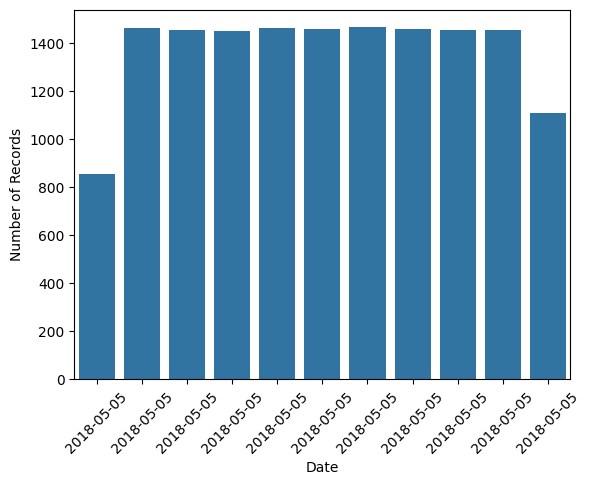

In [101]:
connections['date'] = connections['ts'].dt.date
date_counts = connections['date'].value_counts().sort_index()

connections_ts_graph = sns.barplot(x=date_counts.index, y=date_counts.values)

connections_ts_graph.set(xlabel='Date', ylabel='Number of Records')
connections_ts_graph.set_xticklabels(connections.date, rotation=45)

The dataset was filled with data roughly evenly in time.

### Table Connections - attribute imei

In [102]:
connections.describe()

,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
count,15074,1.507400e+04,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000
mean,2018-05-10 14:03:19.730662144,3.944186e+18,0.628367,10.649835,11.159652,9.960639,11.779597,9.983044,49.518952,50.033587,50.042579,49.858606,49.845721
min,2018-05-05 10:00:00,3.590434e+17,0.000000,1.023410,0.113470,0.022370,2.299720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:59:15,8.630331e+17,0.000000,8.759405,9.342795,8.119385,10.424308,8.128787,24.551032,24.985702,24.950173,24.570863,24.762352
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,10.527030,11.410130,9.868480,12.011270,9.935055,49.285175,50.404290,50.368725,49.839325,49.573495
75%,2018-05-13 04:00:45,8.630331e+18,1.000000,12.507920,13.140740,11.798052,13.362262,11.872960,74.746440,75.024978,74.937760,75.378667,74.872277
max,2018-05-15 18:14:00,8.630331e+18,1.000000,20.726030,19.477060,18.284120,19.684410,19.927250,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.331167e+18,0.483257,2.541594,2.787612,2.564320,2.332968,2.609872,28.933385,28.855641,28.955827,29.024959,28.848587


Attribute imei contains numbers between 3.590434e+17 and 8.630331e+18. Since they are generated as unique numbers, there is no sense in calculating statistical distributions, only reasonable metric is the amount of unique numbers.

In [103]:
connections['imei'].unique().size

500

Table connection in attribute imei contians records for 500 unique devices.

In [104]:
connections.imei.value_counts().sort_values()

imei
8630330696303482055    12
863033069630348099     13
8630330696303481735    15
3590433799317661016    16
863033069630348586     18
                       ..
359043379931766866     44
359043379931766627     45
8630330696303482097    45
3590433799317661057    45
863033069630348735     47
Name: count, Length: 500, dtype: int64

Each device in this dataset has at least 12 and maximum of 47 records. Below is visualized the representation of the number of records per device imei. 

[Text(0, 0, '863033069630348735'),
 Text(100, 0, '3590433799317661925'),
 Text(200, 0, '3590433799317661842'),
 Text(300, 0, '863033069630348149'),
 Text(400, 0, '8630330696303482121')]

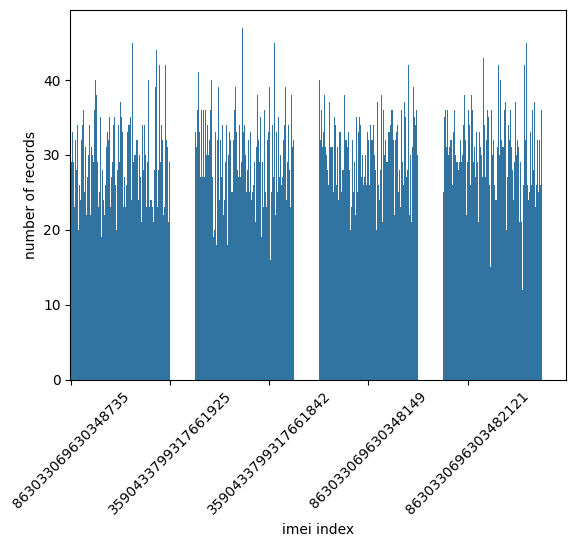

In [105]:
imei_counts = connections['imei'].value_counts()
connections_imei_graph = sns.barplot(x=imei_counts.index, y=imei_counts.values, errorbar=None)

connections_imei_graph.set(xlabel="imei index", ylabel="number of records")

ticks = connections_imei_graph.get_xticks()
connections_imei_graph.set_xticks(ticks[::100])
connections_imei_graph.set_xticklabels(imei_counts.index[::100], rotation=45)


There is no correlation between device and the number of records in dataset.

### mwra todo

In [106]:
connections.describe()

,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
count,15074,1.507400e+04,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000
mean,2018-05-10 14:03:19.730662144,3.944186e+18,0.628367,10.649835,11.159652,9.960639,11.779597,9.983044,49.518952,50.033587,50.042579,49.858606,49.845721
min,2018-05-05 10:00:00,3.590434e+17,0.000000,1.023410,0.113470,0.022370,2.299720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:59:15,8.630331e+17,0.000000,8.759405,9.342795,8.119385,10.424308,8.128787,24.551032,24.985702,24.950173,24.570863,24.762352
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,10.527030,11.410130,9.868480,12.011270,9.935055,49.285175,50.404290,50.368725,49.839325,49.573495
75%,2018-05-13 04:00:45,8.630331e+18,1.000000,12.507920,13.140740,11.798052,13.362262,11.872960,74.746440,75.024978,74.937760,75.378667,74.872277
max,2018-05-15 18:14:00,8.630331e+18,1.000000,20.726030,19.477060,18.284120,19.684410,19.927250,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.331167e+18,0.483257,2.541594,2.787612,2.564320,2.332968,2.609872,28.933385,28.855641,28.955827,29.024959,28.848587


The mean value is 0.628367, which means that more records were reported by devices with malware than those without it.  TODO count a opisat osttane

In [107]:
connections['mwra'].unique()

array([0., 1.])

There are only two values present in attribute mwra: 0 and 1. These values indicate malware-related-activity at a time on a device.  

In [108]:
connections['mwra'].value_counts()

mwra
1.0    9472
0.0    5602
Name: count, dtype: int64

There are 9472 records with malware-related-activity and 5602 records without it.

<Axes: ylabel='count'>

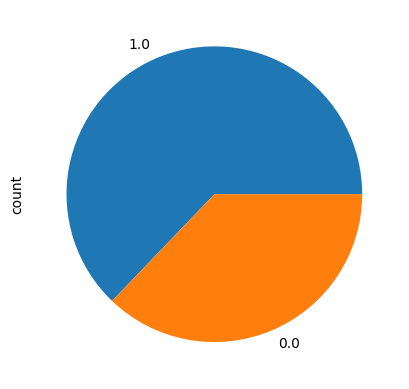

In [109]:
connections.mwra.value_counts().plot(kind='pie')

### c.android.youtube

In [110]:
connections.describe()

,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.raider,c.android.vending,c.UCMobile.intl,c.UCMobile.x86,c.updateassist
count,15074,1.507400e+04,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000,15074.000000
mean,2018-05-10 14:03:19.730662144,3.944186e+18,0.628367,10.649835,11.159652,9.960639,11.779597,9.983044,49.518952,50.033587,50.042579,49.858606,49.845721
min,2018-05-05 10:00:00,3.590434e+17,0.000000,1.023410,0.113470,0.022370,2.299720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:59:15,8.630331e+17,0.000000,8.759405,9.342795,8.119385,10.424308,8.128787,24.551032,24.985702,24.950173,24.570863,24.762352
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,10.527030,11.410130,9.868480,12.011270,9.935055,49.285175,50.404290,50.368725,49.839325,49.573495
75%,2018-05-13 04:00:45,8.630331e+18,1.000000,12.507920,13.140740,11.798052,13.362262,11.872960,74.746440,75.024978,74.937760,75.378667,74.872277
max,2018-05-15 18:14:00,8.630331e+18,1.000000,20.726030,19.477060,18.284120,19.684410,19.927250,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.331167e+18,0.483257,2.541594,2.787612,2.564320,2.332968,2.609872,28.933385,28.855641,28.955827,29.024959,28.848587


The column has 15,074 entries, which indicates that every record in the dataset has a corresponding value for c.android.youtube. The mean value is approximately 10.65. This suggests that, on average, users have some level of interaction with the YouTube app.
The values range from 1.02 to 20.73. The median is approximately 10.53, which is close to the mean, suggesting a somewhat symmetric distribution. The standard deviation is approximately 2.54. 

In [111]:
stats.mode(connections['c.android.youtube'])

ModeResult(mode=np.float64(4.64024), count=np.int64(2))

In [112]:
np.var(connections['c.android.youtube'])

np.float64(6.459269093452482)

In [113]:
iqr = np.percentile(connections['c.android.youtube'], 75) - np.percentile(connections['c.android.youtube'], 25)
iqr

np.float64(3.7485149999999994)

TODO vybrat si dva a ktory bude mat najkrajsie rozlozenie ten pouzit
pre devices imei: jeden record per device

<Axes: xlabel='c.UCMobile.intl', ylabel='Count'>

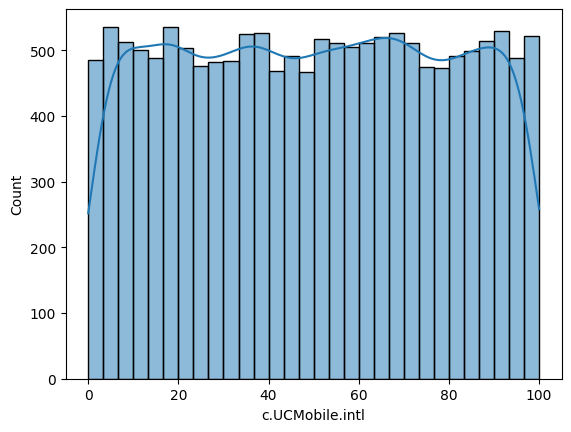

In [114]:
sns.histplot(connections['c.UCMobile.intl'], bins=30, kde=True)